# Import Packages

In [4]:
import pandas as pd
import numpy as np

## Import the Data

In [5]:
raw_csv_data = pd.read_csv("C:/Users/helle/OneDrive/Desktop/Index2018.csv")

In [6]:
df_comp = raw_csv_data.copy()

## Examine the Data

In [7]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [8]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [9]:
df_comp.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [10]:
df_comp.spx.isna().sum()

0

## Plotting the Data

In [11]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'S&P 500 Prices'}>

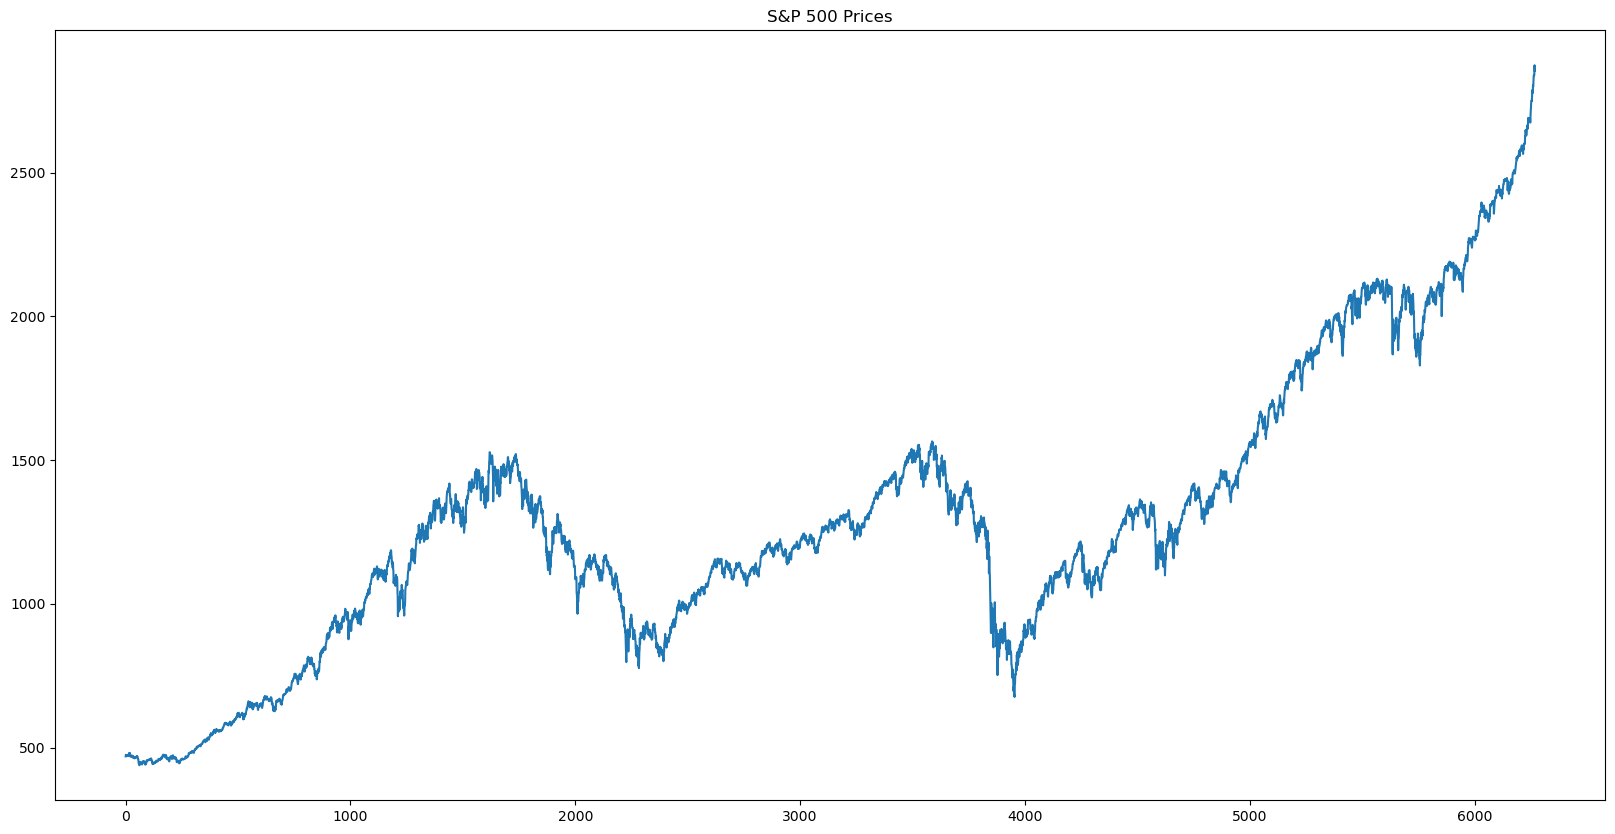

In [12]:
df_comp.spx.plot(figsize= (20,10), title = "S&P 500 Prices")


<AxesSubplot:title={'center':'FTSE100 Prices'}>

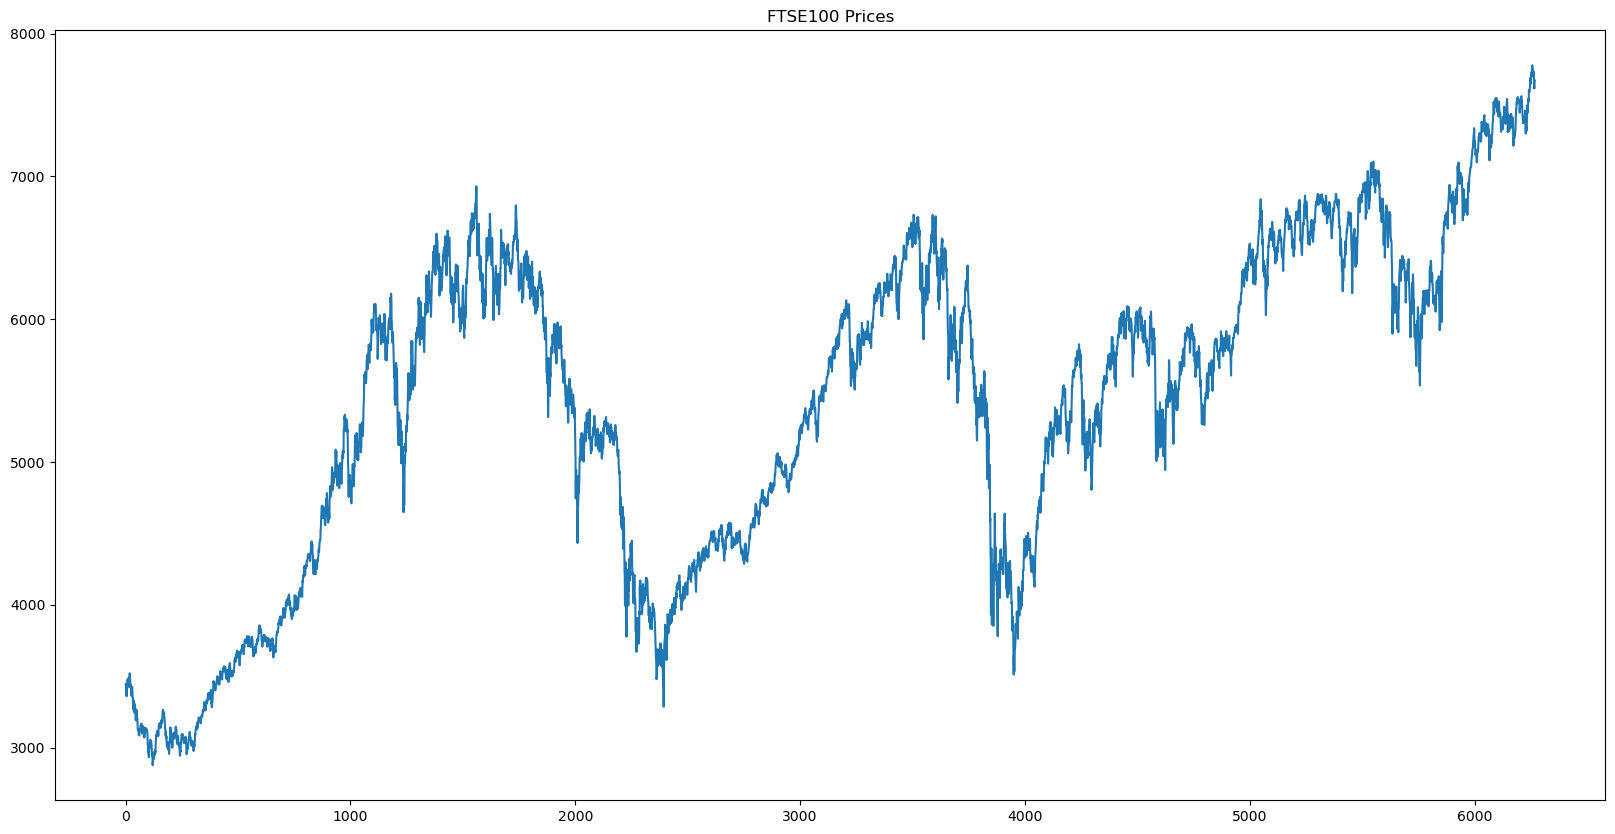

In [13]:
df_comp.ftse.plot(figsize= (20,10), title = "FTSE100 Prices")

df_comp.dax.plot(figsize= (20,10), title = "DAX Prices")

Text(0.5, 1.0, 'S&P v FTSE')

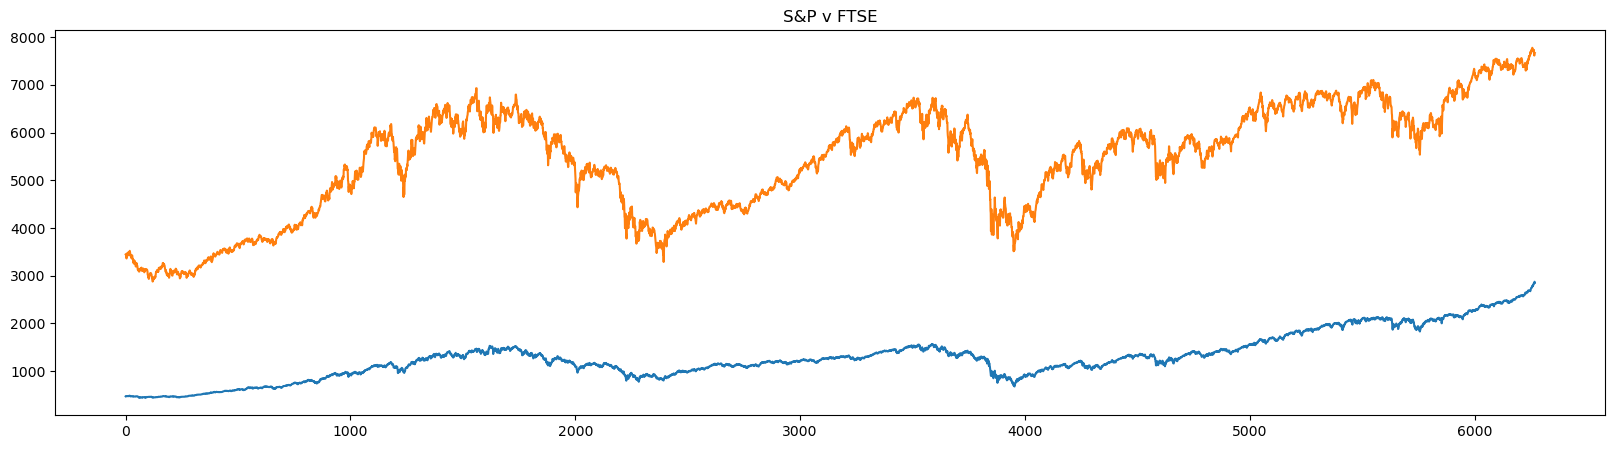

In [14]:
df_comp.spx.plot(figsize= (20,5), title = "S&P 500 Prices")
df_comp.ftse.plot(figsize= (20,5), title = "FTSE100 Prices")
plt.title("S&P v FTSE")


## QQ Plot

In [15]:
import scipy.stats
import pylab

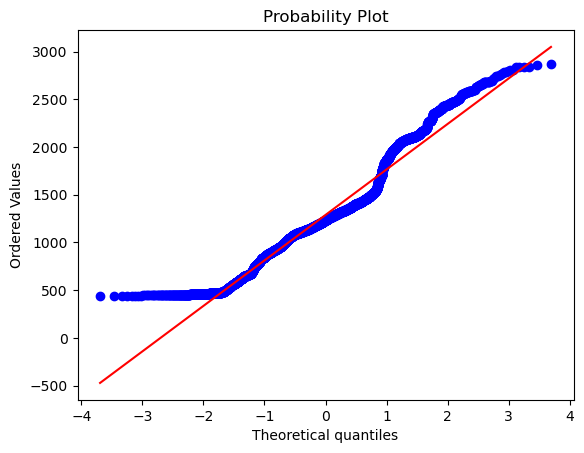

In [16]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
pylab.show()

## Length of the Time Period

In [17]:
df_comp.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [18]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True )

In [19]:
df_comp.date.describe()

C:\Users\helle\AppData\Local\Temp\ipykernel_17904\49469409.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comp.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

## Setting the Index

In [20]:
df_comp.set_index("date", inplace = True)

In [21]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting the Desired Frequency

In [22]:
df_comp = df_comp.asfreq('b')

In [23]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling Missing Values

In [24]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [25]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [26]:
df_comp.spx = df_comp.spx.fillna(method = "ffill")

In [27]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [28]:
df_comp.ftse = df_comp.ftse.fillna(method = "bfill")

In [29]:
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [30]:
df_comp.dax= df_comp.dax.fillna(value =  df_comp.dax.mean())

In [31]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [32]:
df_comp.nikkei = df_comp.nikkei.fillna(method = "bfill")

In [33]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Simplifying the Dataset

In [34]:
df_comp['market_value'] =  df_comp.spx

In [35]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.597179,1288.642547
std,487.868210,2752.604984,1145.568370,4043.683038,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.380000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [36]:
del df_comp['spx']

In [37]:
df_comp.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,6080.063363,5423.690398,14597.597179,1288.642547
std,2752.604984,1145.568370,4043.683038,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4487.880000,10701.130000,992.715221
50%,5774.380000,5663.300000,15030.510000,1233.761241
75%,7442.660000,6304.630175,17860.470000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [38]:
del df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

In [39]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


## Splitting the Data

### (Create a training set and a testing set). Compare predictions to actual values. The closer the forecasts, the better the model. An 80% and 20% split is typiclly appropriate in time series data since the data frame has to stay in chronological order

In [40]:
size = int(len(df_comp)*0.8)

In [41]:
df = df_comp.iloc[:size]

In [42]:
df_test = df_comp.iloc[size:]

In [43]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [44]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


## Importing Additional Packages (repeat)

In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

## Loading and Transforming data (repeat)

In [46]:
raw_csv_data = pd.read_csv("C:/Users/helle/OneDrive/Desktop/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp= df_comp.fillna(method= 'ffill')

## Removing Surplus data (repeat)

In [47]:
df_comp['market_value'] = df_comp.spx

In [48]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## White Noise (Generating White Noise data and plotting its values)

In [49]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [50]:
df['wn'] = wn

C:\Users\helle\AppData\Local\Temp\ipykernel_17904\672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [51]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1091.093610
std,292.559287,296.291045
min,438.920000,-68.907876
25%,914.620000,887.245780
50%,1144.650000,1088.942877
75%,1316.280729,1292.583443
max,1570.252238,2126.034512


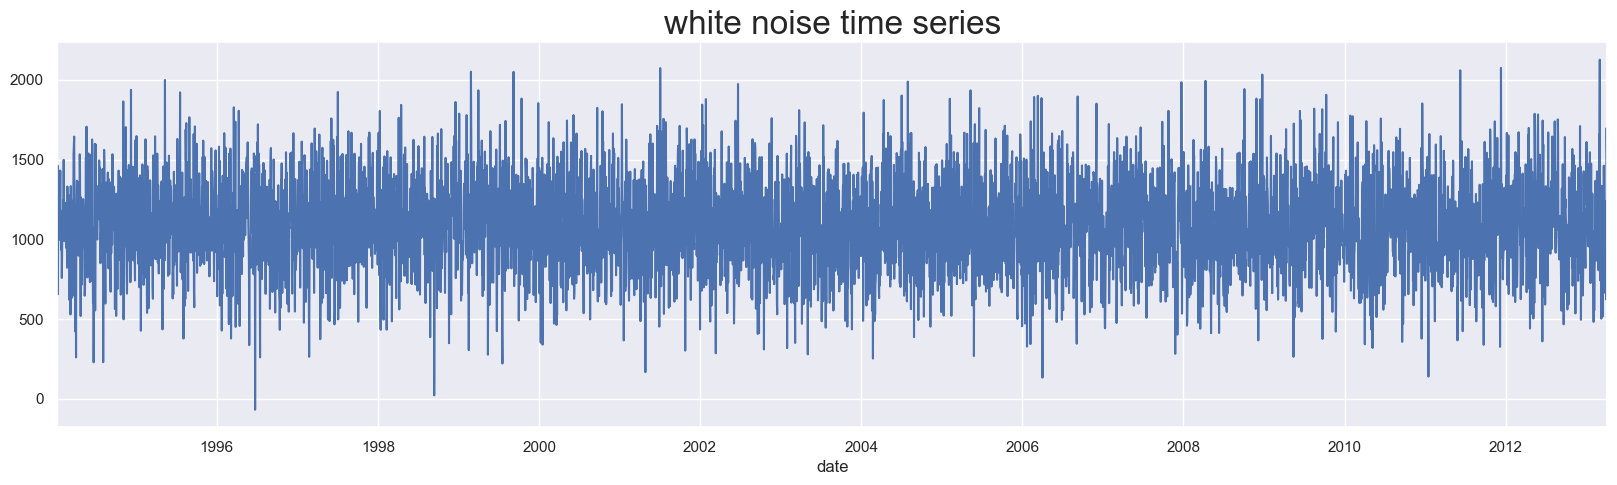

In [52]:
df.wn.plot(figsize = (20, 5))
plt.title("white noise time series", size = 24)
plt.show()

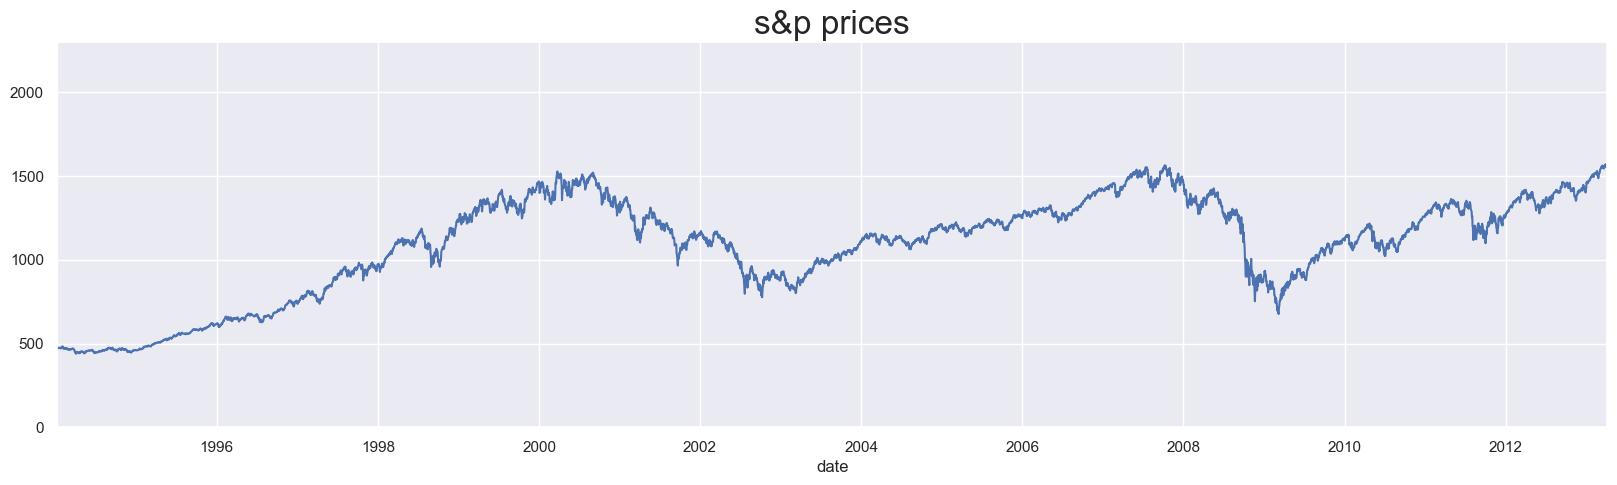

In [53]:
df.market_value.plot(figsize = (20, 5))
plt.title("s&p prices", size = 24)
plt.ylim( 0, 2300)
plt.show()


## Random Walk data points

In [54]:
rw = pd.read_csv("C:/Users/helle/OneDrive/Desktop/Randwalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [55]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [56]:
df['rw'] = rw.price

C:\Users\helle\AppData\Local\Temp\ipykernel_17904\818302766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [57]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,757.724123,1122.139662
1994-01-10,475.27,1463.082131,1080.347860
1994-01-11,474.13,655.674584,1082.095245
1994-01-12,474.17,985.386826,1083.639265
1994-01-13,472.47,1433.968955,1067.146255


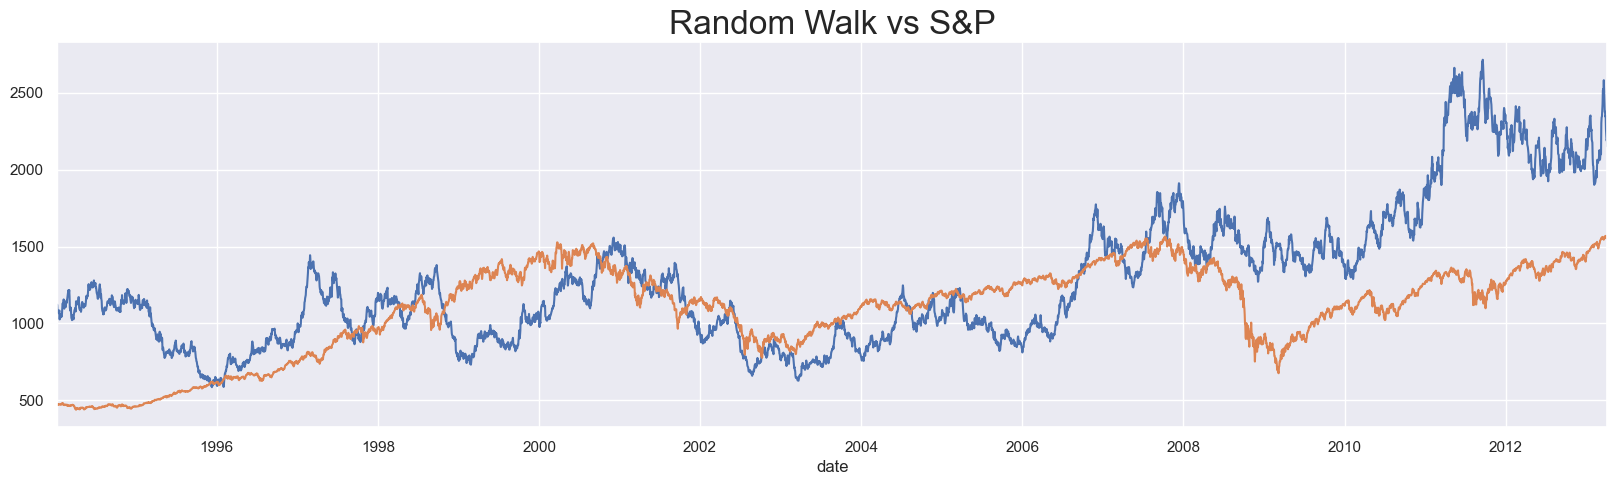

In [58]:
df.rw.plot(figsize = (20, 5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

## Stationarity (Using dickey fuller test)

In [59]:
sts.adfuller(df.market_value)

(-1.7369847452352387,
 0.4121645696770647,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [60]:
sts.adfuller(df.wn)

(-41.45923650658323,
 0.0,
 2,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 70949.93987776275)

In [61]:
sts.adfuller(df.rw)

(-1.3286073927689697,
 0.6159849181617395,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

## Seasonality

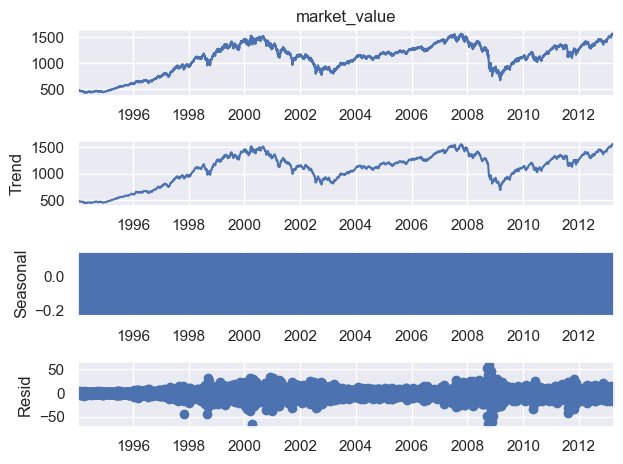

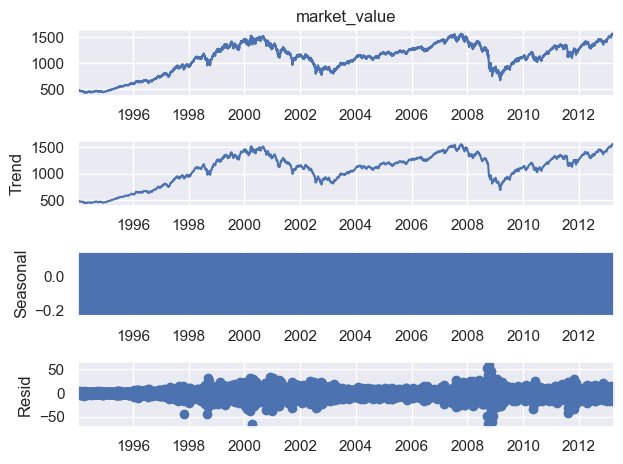

In [62]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()

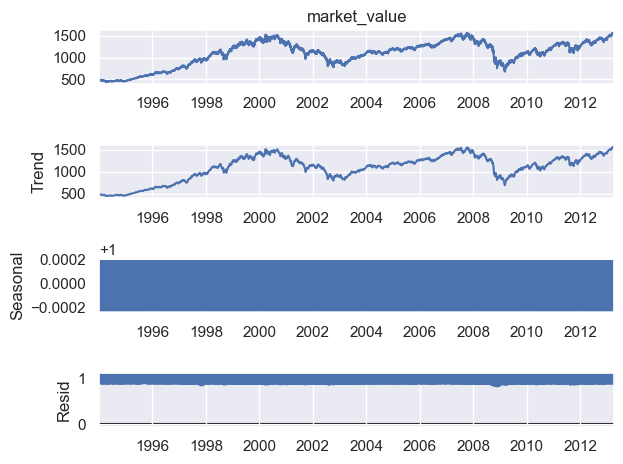

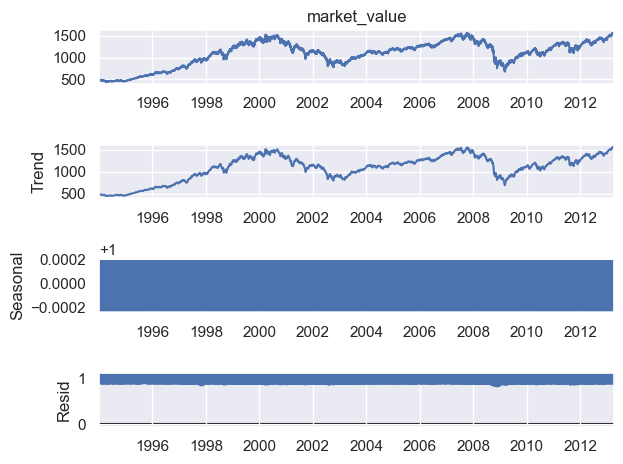

In [63]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()

## ACF (Autocorrelation Function)

Text(0.5, 1.0, 'ACF S&P')

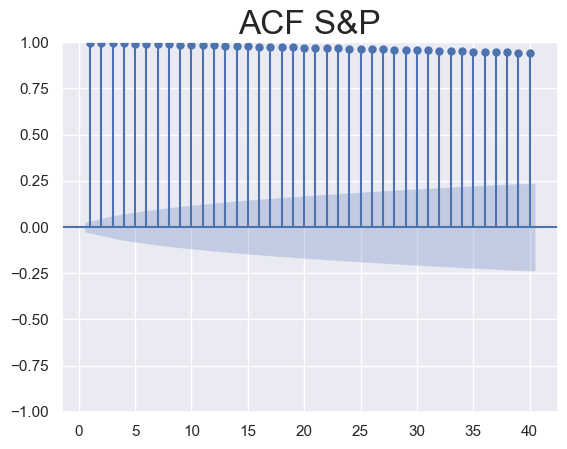

In [64]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)

## PACF (Partial autocorrelation function)

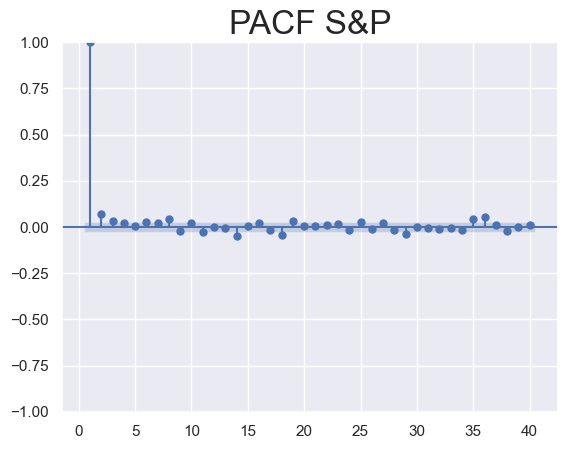

In [65]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

## The ACF for FTSE

In [66]:
raw_csv_data = pd.read_csv("C:/Users/helle/OneDrive/Desktop/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp= df_comp.fillna(method= 'ffill')

In [67]:
df_comp['market_value']=df_comp.ftse

In [68]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

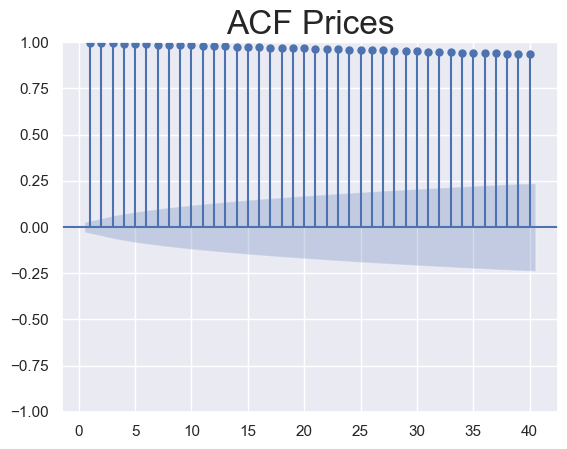

In [69]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF Prices", size = 24)
plt.show()

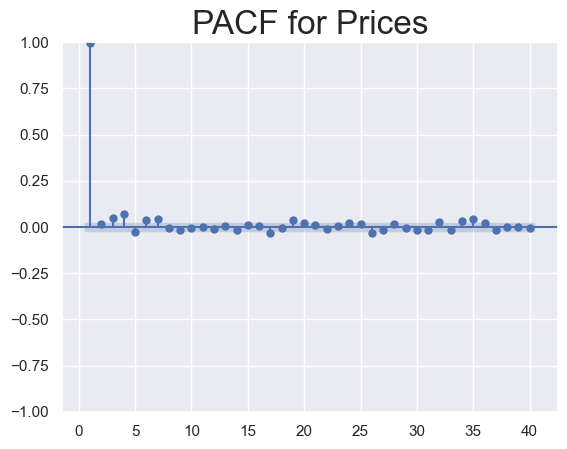

In [70]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 24)
plt.show()

## Import additional packages

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from scipy.stats.distributions import chi2

## The AR(1) Model

In [72]:
model_ar = sm.tsa.ARIMA(df.market_value, order = (1, 0, 0))
results_ar = model_ar.fit()
print(results_ar.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27622.604
Date:                Thu, 02 May 2024   AIC                          55251.207
Time:                        09:12:12   BIC                          55270.772
Sample:                    01-07-1994   HQIC                         55258.063
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6374    423.327     12.023      0.000    4259.931    5919.344
ar.L1          0.9984      0.001   1147.579      0.000       0.997       1.000
sigma2      3511.3843     40.874     85.907      0.0

## Higher Lag AR Models

In [73]:
model_ar_2 = sm.tsa.ARIMA(df.market_value, order = (2, 0, 0))
results_ar_2 = model_ar_2.fit()
print(results_ar_2.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27621.949
Date:                Thu, 02 May 2024   AIC                          55251.898
Time:                        09:12:13   BIC                          55277.984
Sample:                    01-07-1994   HQIC                         55261.039
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    368.251     13.821      0.000    4367.881    5811.400
ar.L1          0.9811      0.010     99.868      0.000       0.962       1.000
ar.L2          0.0171      0.010      1.749      0.0

In [74]:
model_ar_3 = sm.tsa.ARIMA(df.market_value, order = (3, 0, 0))
results_ar_3 = model_ar_3.fit()
print(results_ar_3.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27615.962
Date:                Thu, 02 May 2024   AIC                          55241.925
Time:                        09:12:15   BIC                          55274.532
Sample:                    01-07-1994   HQIC                         55253.351
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    378.584     13.444      0.000    4347.631    5831.651
ar.L1          0.9802      0.010     99.076      0.000       0.961       1.000
ar.L2         -0.0309      0.013     -2.315      0.0

## LLR Test

In [75]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## Comparing Higher Lag AR Models

In [76]:
LLR_test(model_ar_2, model_ar_3)

0.001

## The DF Test

In [77]:
sts.adfuller(df.market_value)

(-1.9041551418836875,
 0.3301089327702828,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

## Using Returns

In [78]:
df['returns']= df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

C:\Users\helle\AppData\Local\Temp\ipykernel_17904\718818066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns']= df.market_value.pct_change(1).mul(100)


In [79]:
sts.adfuller(df.returns)

(-12.770265719497214,
 7.798058336039059e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.767245697501)

## ACF and PACF for Returns


Text(0.5, 1.0, 'ACF FTSE Returns')

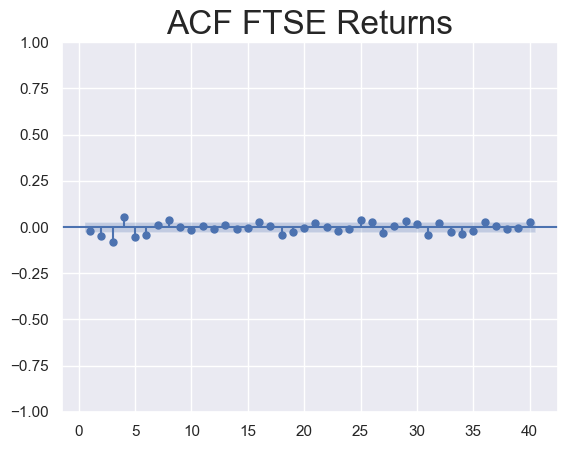

In [80]:
sgt.plot_acf(df.returns, lags=40, zero = False)
plt.title("ACF FTSE Returns", size=24)


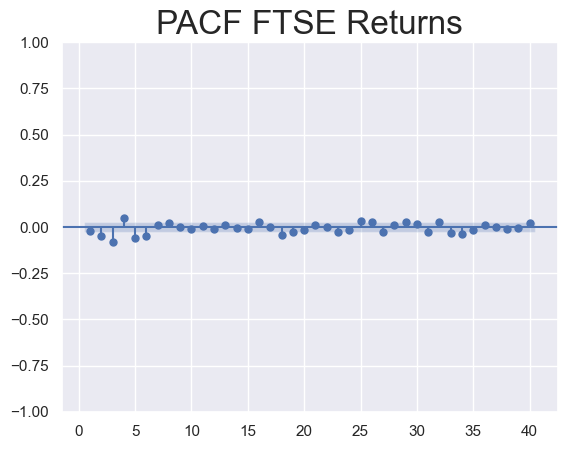

In [81]:
sgt.plot_pacf(df.returns, lags=40, zero = False, method = ('ols'))
plt.title("PACF FTSE Returns", size=24)
plt.show()

## AR(1) for Returns

In [82]:
model_ret_ar_1 = sm.tsa.ARIMA(df.returns, order = (1,0,0))

In [83]:
results_ret_ar_1 = model_ret_ar_1.fit()

In [84]:
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7929.749
Date:                Thu, 02 May 2024   AIC                          15865.497
Time:                        09:13:19   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.143      0.253      -0.013       0.051
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2         1.3790      0.014    100.092      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7872.72
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecasting (skipped ahead in course)

In [85]:

pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [86]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from arch import arch_model
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

C:\Users\helle\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Loading the Data

In [87]:
raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = "1994-01-07", 
                              end = "2019-09-01", interval = "1d", group_by = 'ticker', auto_adjust = True, threads = True)

[*********************100%%**********************]  4 of 4 completed


In [88]:
df_comp = raw_data.copy()

In [89]:
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [90]:
df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

## Creating Returns

In [91]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1).mul(100)
df_comp['ret_dax'] = df_comp.dax.pct_change(1).mul(100)
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1).mul(100)

In [92]:
df_comp['norm_ret_spx'] = df_comp.ret_spx.div(df_comp.ret_spx[1])*100
df_comp['norm_ret_ftse'] = df_comp.ret_ftse.div(df_comp.ret_ftse[1])*100
df_comp['norm_ret_dax'] = df_comp.ret_dax.div(df_comp.ret_dax[1])*100
df_comp['norm_ret_nikkei'] = df_comp.ret_nikkei.div(df_comp.ret_nikkei[1])*100

## Splitting the Data

In [93]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## Fitting a Model

In [94]:
model_ar = sm.tsa.ARIMA(df.ftse, order = (1,0,0))
results_ar = model_ar.fit()

In [95]:
df.tail()

Ticker,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei,norm_ret_spx,norm_ret_ftse,norm_ret_dax,norm_ret_nikkei
Price,,,,,,,,,,,,
Date,,,,,,,,,,,,
2014-07-09,1972.829956,9808.200195,6718.000000,15302.650391,0.464427,-0.304222,0.363568,-0.076789,-193.623849,39.056133,260.939581,-33.873062
2014-07-10,1964.680054,9659.129883,6672.399902,15216.469727,-0.413107,-0.678775,-1.519854,-0.563175,172.228229,87.141370,-1090.828512,-248.427258
2014-07-11,1967.569946,9666.339844,6690.200195,15164.040039,0.147092,0.266775,0.074644,-0.344559,-61.324138,-34.248669,53.573442,-151.991545
2014-07-14,1977.099976,9783.009766,6746.100098,15296.820312,0.484355,0.835549,1.206971,0.875626,-201.932230,-107.268090,866.266436,386.255523
2014-07-15,1973.280029,9719.410156,6710.500000,15395.160156,-0.193210,-0.527714,-0.650103,0.642878,80.550866,67.748084,-466.591262,283.585757


In [96]:
# create variables that will help us change the periods easily instead of typing them out every time
# make sure the start and end dates are business days, otherwise the code will result in an error
start_date = "2014-07-15"
end_date = "2015-01-01"

In [97]:

df_pred = results_ar.predict(start = start_date, end = end_date)

Text(0.5, 1.0, 'Predictions')

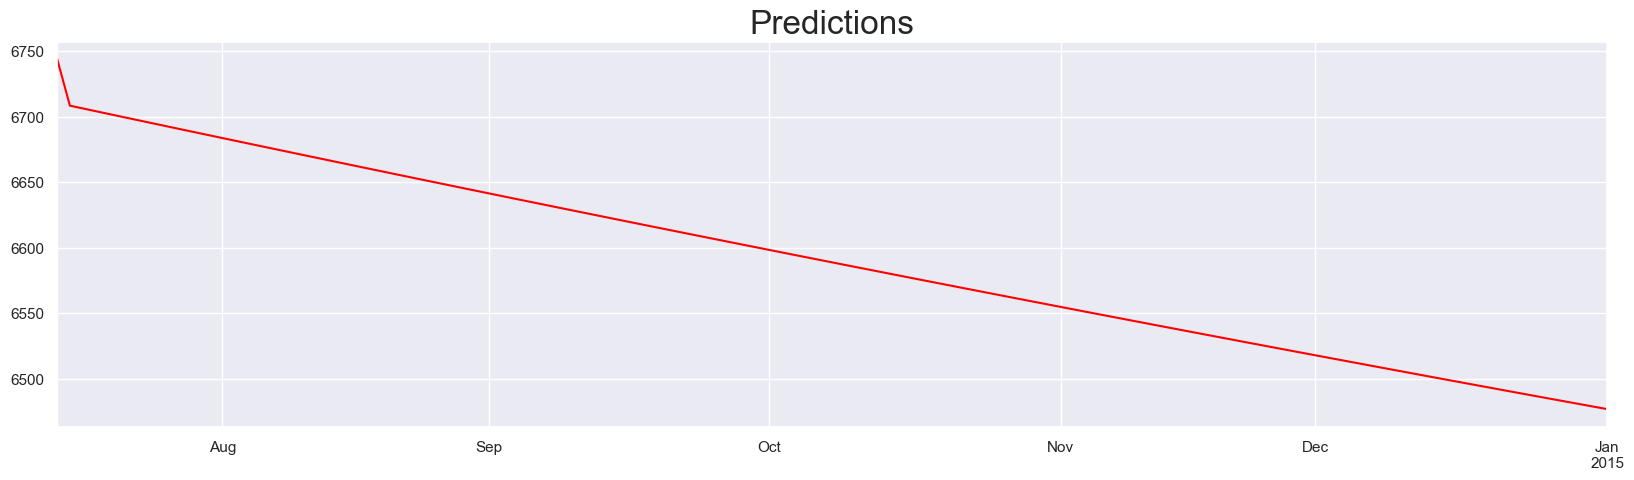

In [98]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = "red")
plt.title("Predictions", size =24)

## ^^AR model is bad at estimating non-stationary data

Text(0.5, 1.0, 'Predictions vs Actual')

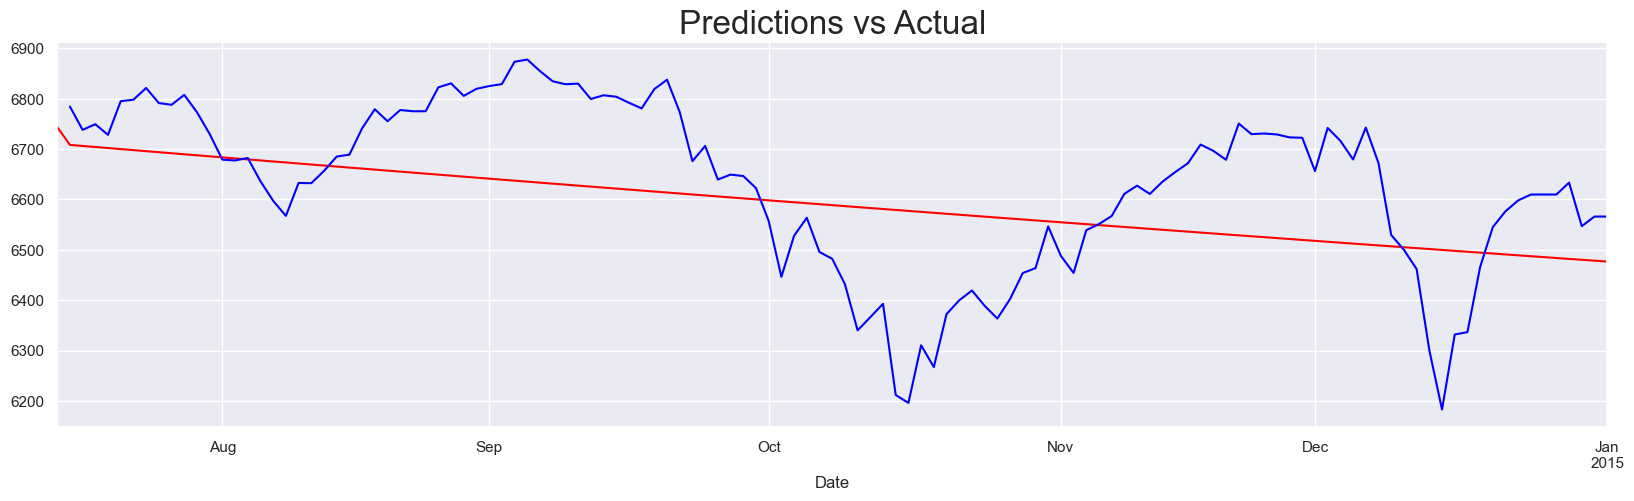

In [99]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size =24)

## Using Returns Instead

Text(0.5, 1.0, 'Predictions vs Actual (Returns)')

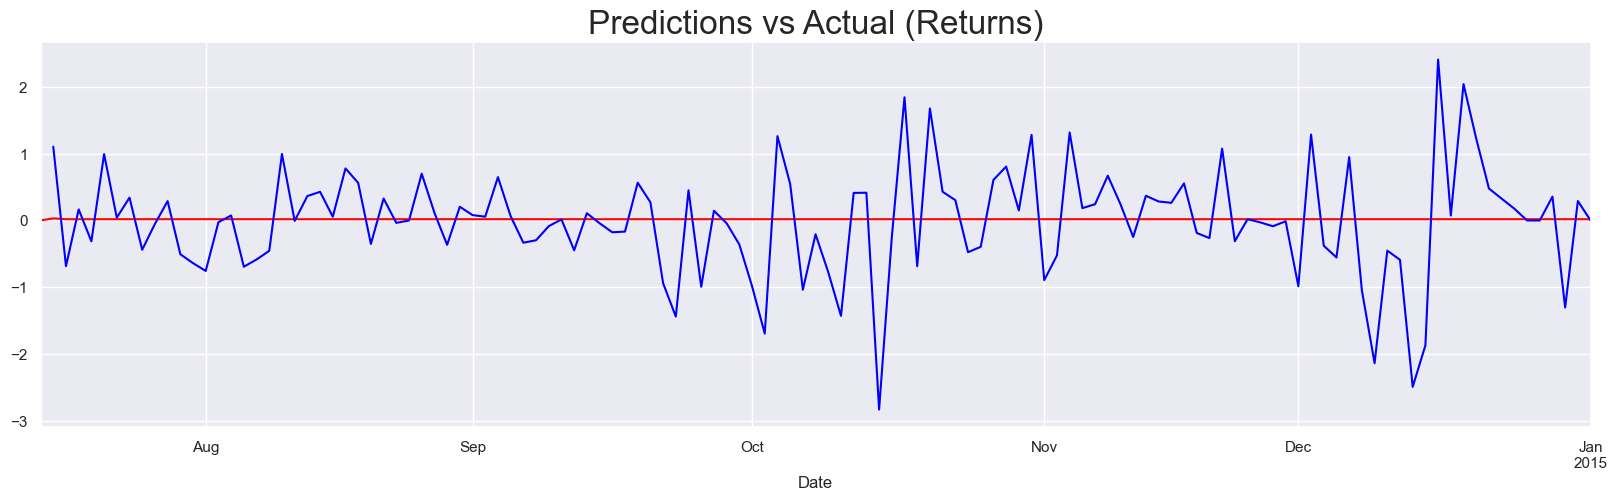

In [100]:
end_date = "2015-01-01"

model_ret_ar = sm.tsa.ARIMA(df.ret_ftse[1:], order = (1,0,0))
results_ret_ar = model_ret_ar.fit()

df_pred_ar = results_ret_ar.predict(start = start_date, end = end_date)

df_pred_ar[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size =24)

In [101]:
results_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               ret_ftse   No. Observations:                 5351
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -8343.712
Date:                Thu, 02 May 2024   AIC                          16693.424
Time:                        09:13:42   BIC                          16713.179
Sample:                    01-11-1994   HQIC                         16700.324
                         - 07-15-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0191      0.016      1.226      0.220      -0.011       0.050
ar.L1         -0.0224      0.008     -2.740      0.006      -0.038      -0.006
sigma2         1.3240      0.013    104.612      0.000       1.299       1.349
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              8959.57
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## MA Model

Text(0.5, 1.0, 'Predictions vs Actual (Returns)')

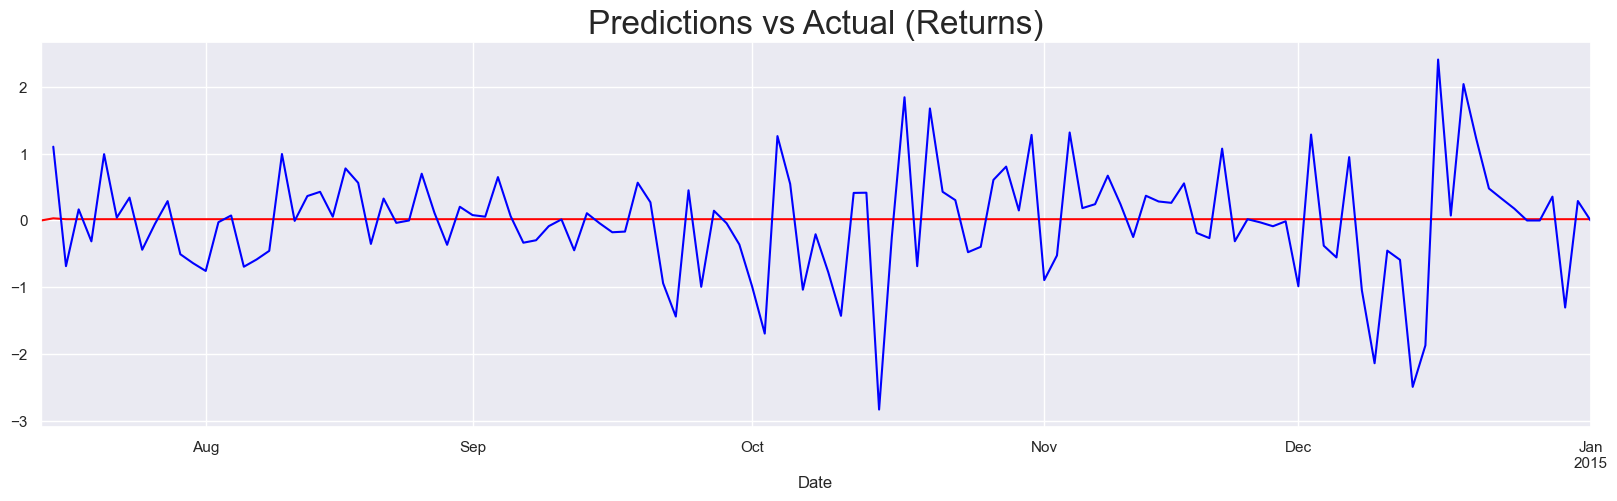

In [102]:
end_date = "2015-01-01"

model_ret_ma = sm.tsa.ARIMA(df.ret_ftse[1:], order = (0,0,1))
results_ret_ma = model_ret_ma.fit()

df_pred_ma = results_ret_ma.predict(start = start_date, end = end_date)

df_pred_ma[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size =24)

In [103]:
df_pred_ma.head()

2014-07-15   -0.001408
2014-07-16    0.032249
2014-07-17    0.019113
2014-07-18    0.019113
2014-07-21    0.019113
Freq: B, Name: predicted_mean, dtype: float64

## ARMA

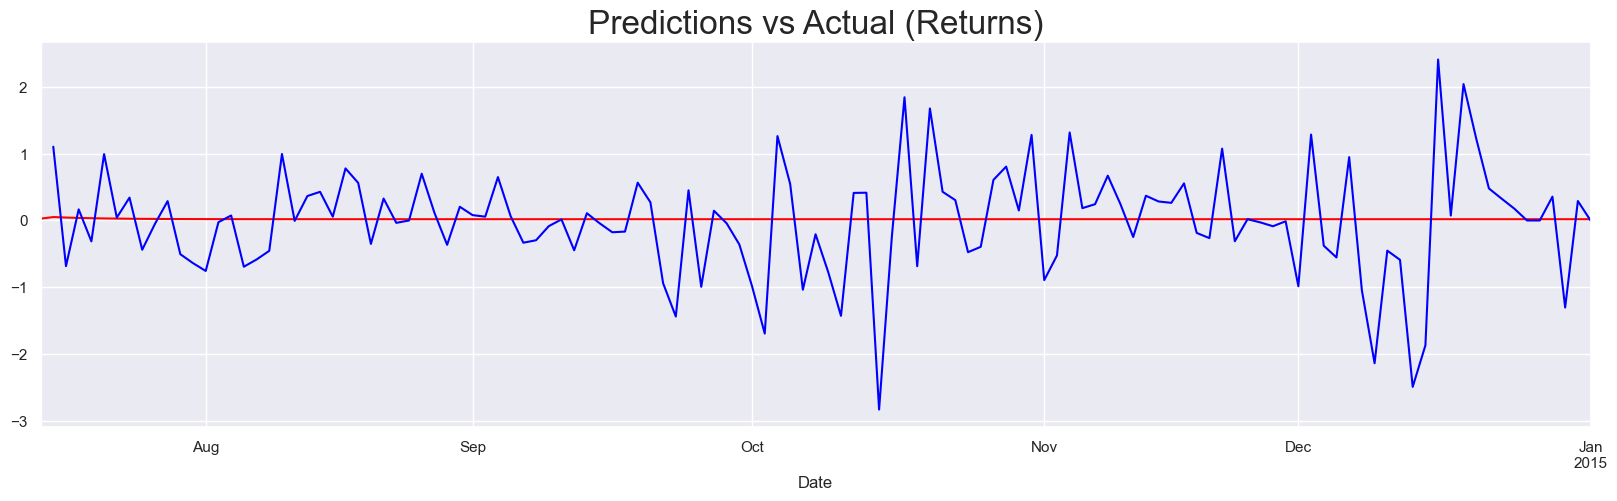

In [104]:
model_ret_arma = sm.tsa.ARIMA(df.ret_ftse[1:], order=(1,0,1))
results_ret_arma = model_ret_arma.fit()

df_pred_arma = results_ret_arma.predict(start = start_date, end = end_date)

df_pred_arma[start_date:end_date].plot(figsize = (20,5), color = "red")   
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

In [105]:
df_pred_arma.head()

2014-07-15    0.027277
2014-07-16    0.051308
2014-07-17    0.044092
2014-07-18    0.038497
2014-07-21    0.034157
Freq: B, Name: predicted_mean, dtype: float64

In [106]:
df_pred_arma.tail()

2014-12-26    0.019164
2014-12-29    0.019164
2014-12-30    0.019164
2014-12-31    0.019164
2015-01-01    0.019164
Freq: B, Name: predicted_mean, dtype: float64

## ARMAX

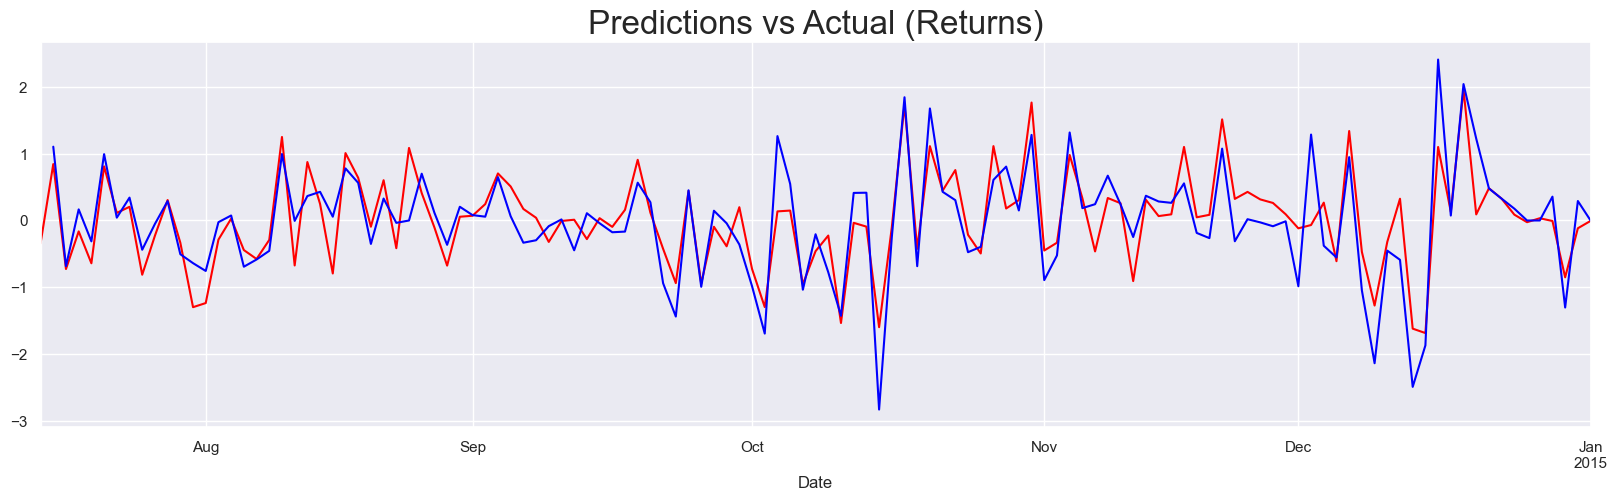

In [107]:
model_ret_armax = sm.tsa.ARIMA(df.ret_ftse[1:], exog = df[["ret_spx", "ret_dax", "ret_nikkei"]][1:], order = (1,0,0))
results_ret_armax = model_ret_armax.fit()

df_pred_armax = results_ret_armax.predict(start = start_date, end = end_date, 
                                          exog = df_test[["ret_spx","ret_dax","ret_nikkei"]][start_date:end_date]) 

df_pred_armax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()